In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [3]:
d_set = tf.keras.preprocessing.image_dataset_from_directory(
    "train", 
    shuffle = True,
    image_size = (256,256),
    batch_size = 32
)

Found 10000 files belonging to 10 classes.


In [4]:
cls_nms= d_set.class_names
cls_nms

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [5]:
len(d_set)

313

In [6]:
313*32

10016

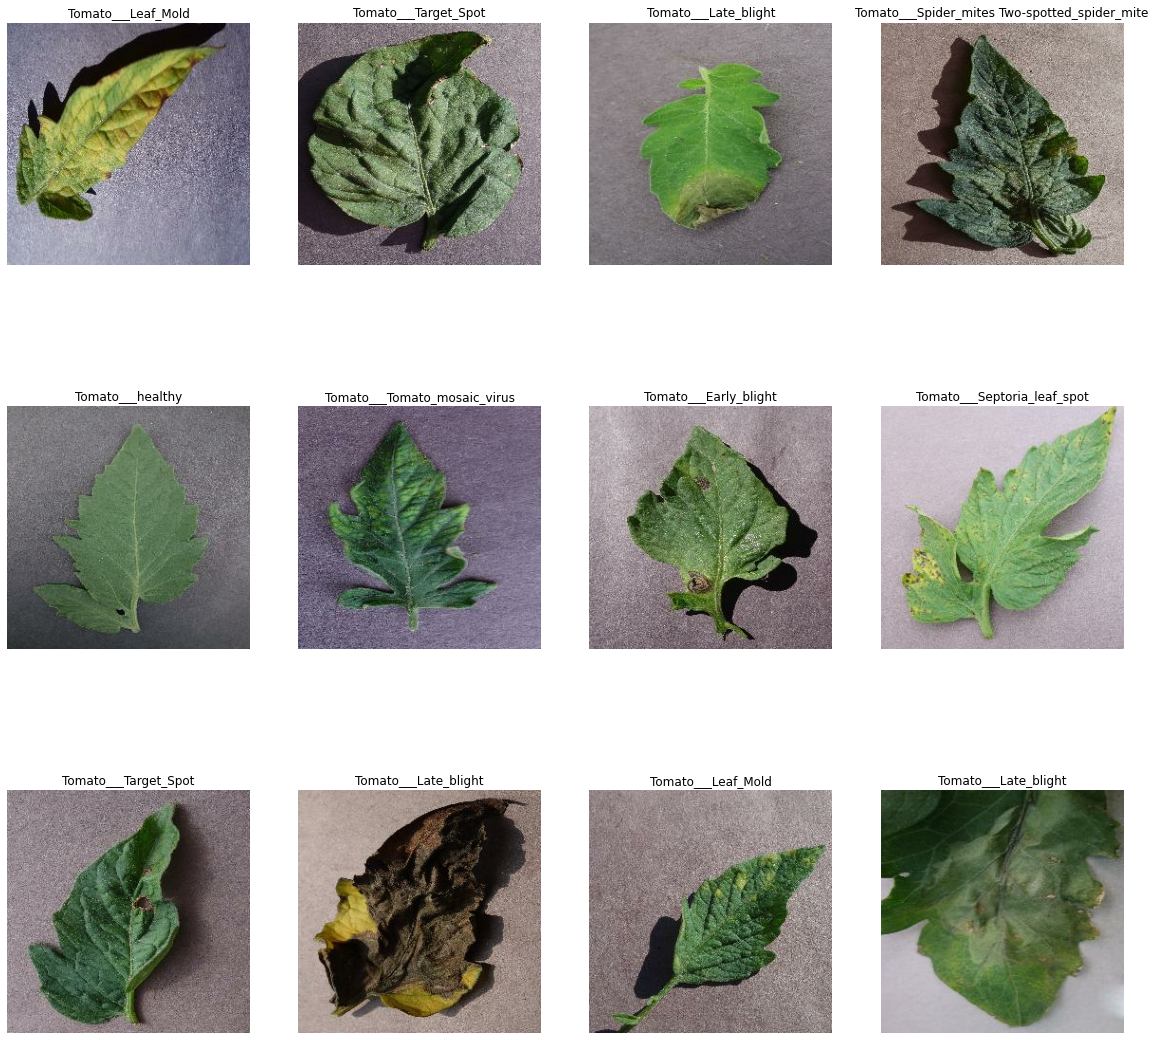

In [7]:
plt.figure(figsize=(20,20))
for img_batch, lbl_batch in d_set.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(cls_nms[lbl_batch[i]])
        

In [7]:
trn_size = 0.8
len(d_set)*trn_size

250.4

In [8]:
trn_d_set = d_set.take(250)
len(trn_d_set)

250

In [9]:
test_d_set = d_set.skip(250)
len(test_d_set)

63

In [10]:
vald_size = 0.1
len(d_set)*vald_size

31.3

In [11]:
vald_d_set = test_d_set.take(31)
len(vald_d_set)

31

In [12]:
test_d_set = test_d_set.skip(31)
len(test_d_set)

32

In [13]:
trn_d_set = trn_d_set.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
vald_d_set = vald_d_set.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_d_set = test_d_set.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [14]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [15]:
data_aug = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomContrast(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

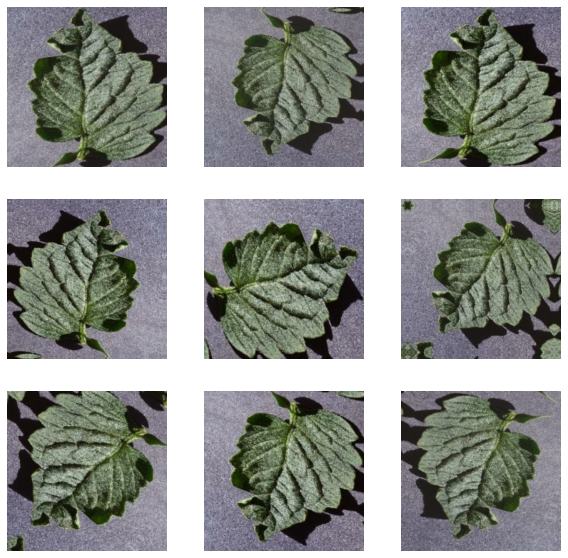

In [31]:
plt.figure(figsize=(10, 10))
for images, _ in trn_d_set.take(1):
  for i in range(9):
    augmented_images = data_aug(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
   

In [17]:
model1 = keras.Sequential([
    resize_rescale,
    data_aug,
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128,  activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

r1 = model1.fit(trn_d_set, validation_data=vald_d_set, batch_size=32,epochs=30)

Epoch 1/30


250/250 [==============================] - 191s 568ms/step - loss: 11.7375 - accuracy: 0.1138 - val_loss: 2.2984 - val_accuracy: 0.1179
Epoch 2/30
250/250 [==============================] - 153s 613ms/step - loss: 2.2977 - accuracy: 0.0980 - val_loss: 2.3003 - val_accuracy: 0.0887
Epoch 3/30
250/250 [==============================] - 185s 741ms/step - loss: 2.3297 - accuracy: 0.1000 - val_loss: 2.2968 - val_accuracy: 0.0887
Epoch 4/30
250/250 [==============================] - 158s 632ms/step - loss: 2.2942 - accuracy: 0.1001 - val_loss: 2.2958 - val_accuracy: 0.0887
Epoch 5/30
250/250 [==============================] - 143s 573ms/step - loss: 2.2949 - accuracy: 0.1000 - val_loss: 2.3037 - val_accuracy: 0.0887
Epoch 6/30
250/250 [==============================] - 140s 559ms/step - loss: 2.3028 - accuracy: 0.0960 - val_loss: 2.3036 - val_accuracy: 0.0887
Epoch 7/30
250/250 [==============================] - 135s 539ms/step - loss: 2.3024 - accuracy: 0.0999 - val_loss: 2.3020 - val_accur

In [18]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 128)               25165952  
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 25,167,242
Trainable params: 25,167,242
Non-trainable params: 0
_________________________________________________________________


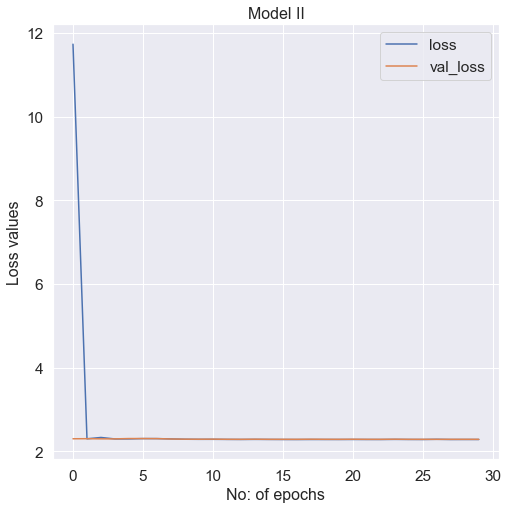

In [67]:
plt.plot(r1.history['loss'],label = 'loss')
plt.plot(r1.history['val_loss'],label = 'val_loss')
plt.xlabel('No: of epochs',fontsize = 16)
plt.ylabel('Loss values', fontsize =16)
plt.title('Model II',fontsize =16)
plt.legend()

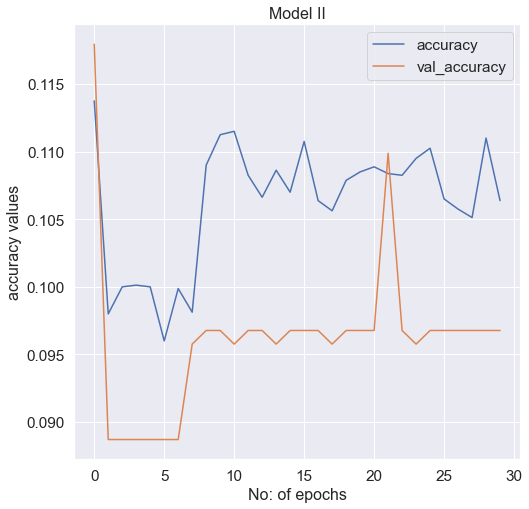

In [68]:
plt.plot(r1.history['accuracy'],label = 'accuracy')
plt.plot(r1.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('No: of epochs',fontsize = 16)
plt.ylabel('accuracy values', fontsize =16)
plt.title('Model II',fontsize =16)
plt.legend()

In [69]:
model1.evaluate(test_d_set,return_dict = True)

32/32 [==============================] - 9s 255ms/step - loss: 2.2873 - accuracy: 0.1032


{'loss': 2.2873241901397705, 'accuracy': 0.1031746044754982}

In [70]:
labels = ['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']


In [71]:
def actual1_and_predicted1(d_set): 
 
  actual1 = [labels for _, labels in d_set.unbatch()]
  predicted1 = model1.predict(d_set)

  actual1 = tf.stack(actual1, axis=0)
  predicted1 = tf.concat(predicted1, axis=0)
  predicted1 = tf.argmax(predicted1, axis=1)

  return actual1, predicted1

In [49]:
def cmatrix1(actual1, predicted1, labels, ds_type):
  cm = tf.math.confusion_matrix(actual1, predicted1)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(8, 8)})
  sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix - Model II - testing ')
  ax.set_xlabel('Predicted Truth')
  ax.set_ylabel('Actual Truth')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0) 
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

250/250 [==============================] - 73s 291ms/step


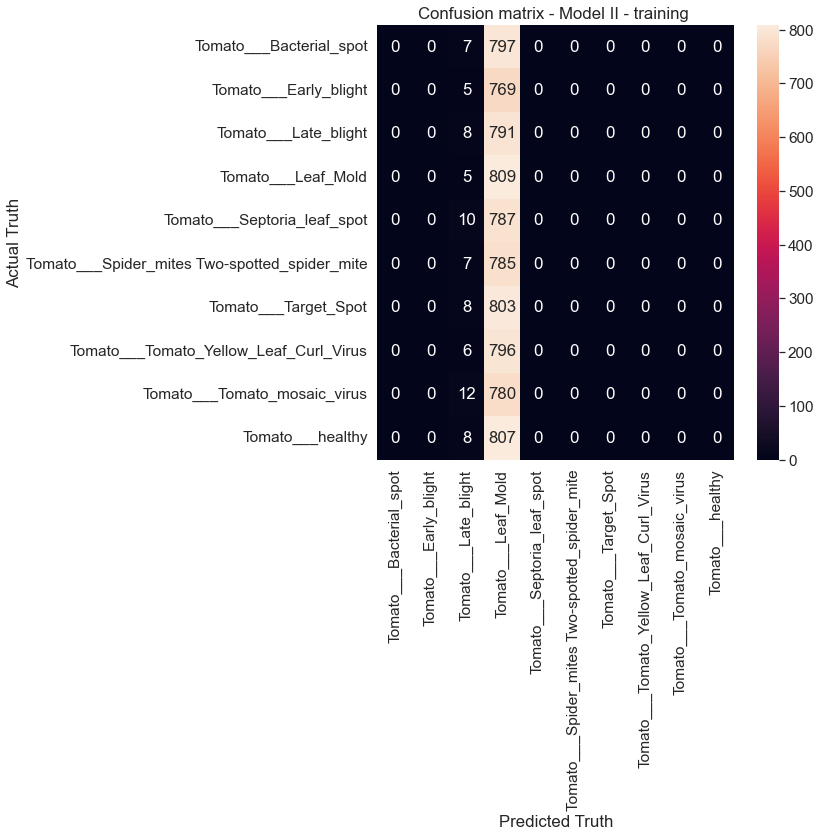

In [48]:
actual1, predicted1 = actual1_and_predicted1(trn_d_set)
cmatrix1(actual1, predicted1, labels, 'training')

32/32 [==============================] - 2s 72ms/step


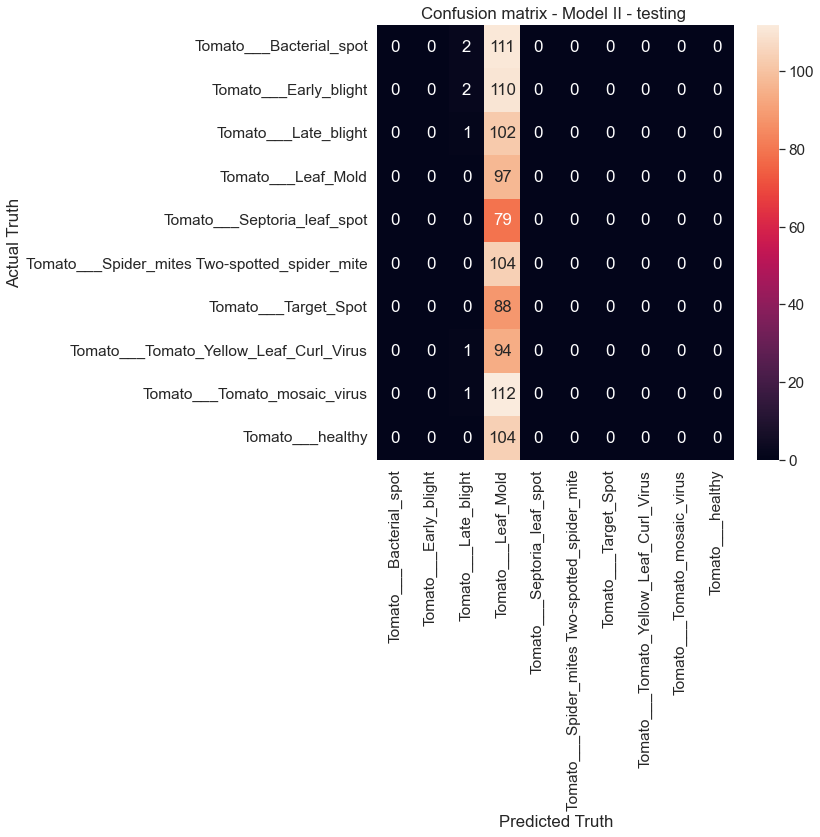

In [50]:
actual1, predicted1 = actual1_and_predicted1(test_d_set)
cmatrix1(actual1, predicted1, labels, 'test')

In [27]:
def metrics1(y_actual,y_pred, labels):
  
  cm = tf.math.confusion_matrix(y_actual, y_pred)
  tp = np.diag(cm) 
  precision1 = dict()
  recall1 = dict()
  for i in range(len(labels)):
    col = cm[:, i]
    fp = np.sum(col) - tp[i] 

    row = cm[i, :]
    fn = np.sum(row) - tp[i] 

    precision1[labels[i]] = tp[i] / (tp[i] + fp) 

    recall1[labels[i]] = tp[i] / (tp[i] + fn) 

  return precision1, recall1

In [28]:
precision1, recall1 = metrics1(actual1, predicted1, labels)

C:\Users\vidhyadevi\AppData\Local\Temp\ipykernel_7924\2829730568.py:14: RuntimeWarning: invalid value encountered in long_scalars
  precision1[labels[i]] = tp[i] / (tp[i] + fp)


In [64]:
model2 = keras.Sequential([
    resize_rescale,
    data_aug,
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(60,activation = 'relu'),
    keras.layers.Dense(10,activation='softmax')
])

model2.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])
r2 = model2.fit(trn_d_set, validation_data= vald_d_set, batch_size = 32, epochs = 30)

Epoch 1/30
250/250 [==============================] - 335s 1s/step - loss: 9.0994 - accuracy: 0.2124 - val_loss: 2.9640 - val_accuracy: 0.2329
Epoch 2/30
250/250 [==============================] - 196s 783ms/step - loss: 2.8090 - accuracy: 0.3094 - val_loss: 3.2244 - val_accuracy: 0.2692
Epoch 3/30
250/250 [==============================] - 140s 561ms/step - loss: 2.2900 - accuracy: 0.3663 - val_loss: 2.0705 - val_accuracy: 0.3105
Epoch 4/30
250/250 [==============================] - 133s 532ms/step - loss: 2.2098 - accuracy: 0.3545 - val_loss: 1.7078 - val_accuracy: 0.3952
Epoch 5/30
250/250 [==============================] - 142s 568ms/step - loss: 1.8437 - accuracy: 0.3853 - val_loss: 3.0783 - val_accuracy: 0.2450
Epoch 6/30
250/250 [==============================] - 166s 666ms/step - loss: 1.7786 - accuracy: 0.4035 - val_loss: 1.9045 - val_accuracy: 0.3770
Epoch 7/30
250/250 [==============================] - 251s 1s/step - loss: 1.7415 - accuracy: 0.4169 - val_loss: 1.9751 - val_a

In [72]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 flatten_2 (Flatten)         (None, 196608)            0         
                                                                 
 dense_5 (Dense)             (None, 128)               25165952  
                                                                 
 dense_6 (Dense)             (None, 60)                7740      
                                                                 
 dense_7 (Dense)             (None, 10)                610       
                                                                 
Total params: 25,174,302
Trainable params: 25,174,302


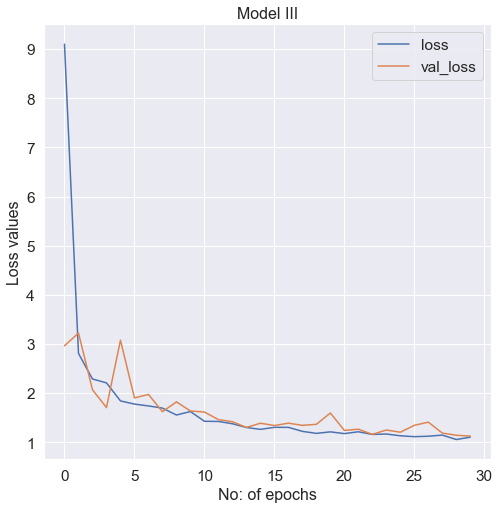

In [73]:
plt.plot(r2.history['loss'],label = 'loss')
plt.plot(r2.history['val_loss'],label = 'val_loss')
plt.xlabel('No: of epochs',fontsize = 16)
plt.ylabel('Loss values', fontsize =16)
plt.title('Model III',fontsize =16)
plt.legend()

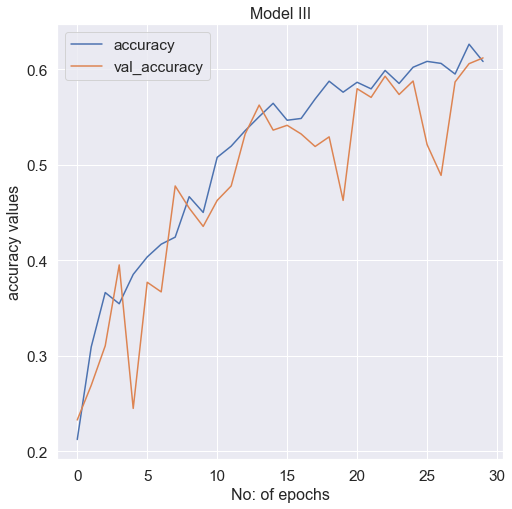

In [75]:
plt.plot(r2.history['accuracy'],label = 'accuracy')
plt.plot(r2.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('No: of epochs',fontsize = 16)
plt.ylabel('accuracy values', fontsize =16)
plt.title('Model III',fontsize =16)
plt.legend()

In [76]:
model2.evaluate(test_d_set,return_dict = True)

32/32 [==============================] - 1s 41ms/step - loss: 1.0910 - accuracy: 0.6012


{'loss': 1.0910452604293823, 'accuracy': 0.601190447807312}

In [77]:
def actual2_and_predicted2(d_set): 
 
  actual2 = [labels for _, labels in d_set.unbatch()]
  predicted2 = model2.predict(d_set)

  actual2 = tf.stack(actual2, axis=0)
  predicted2 = tf.concat(predicted2, axis=0)
  predicted2 = tf.argmax(predicted2, axis=1)

  return actual2, predicted2

In [80]:
def cmatrix2(actual2, predicted2, labels, ds_type):
  cm = tf.math.confusion_matrix(actual2, predicted2)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(8, 8)})
  sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix - Model III - training')
  ax.set_xlabel('Predicted Truth')
  ax.set_ylabel('Actual Truth')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0) 
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

250/250 [==============================] - 81s 324ms/step


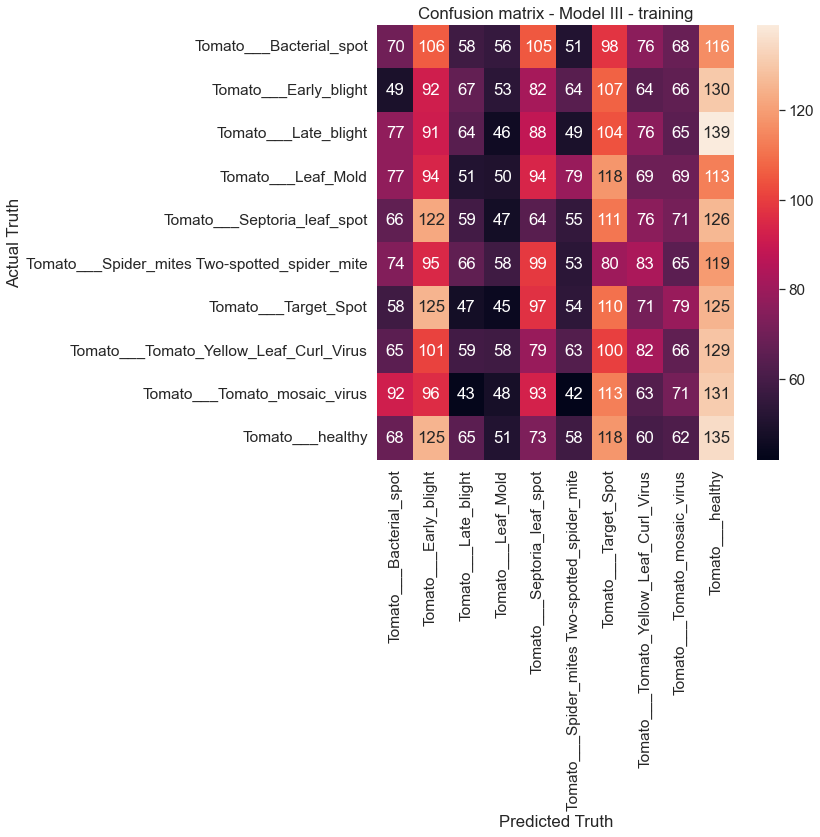

In [81]:
actual2, predicted2 = actual2_and_predicted2(trn_d_set)
cmatrix2(actual2, predicted2, labels, 'training')

32/32 [==============================] - 2s 38ms/step


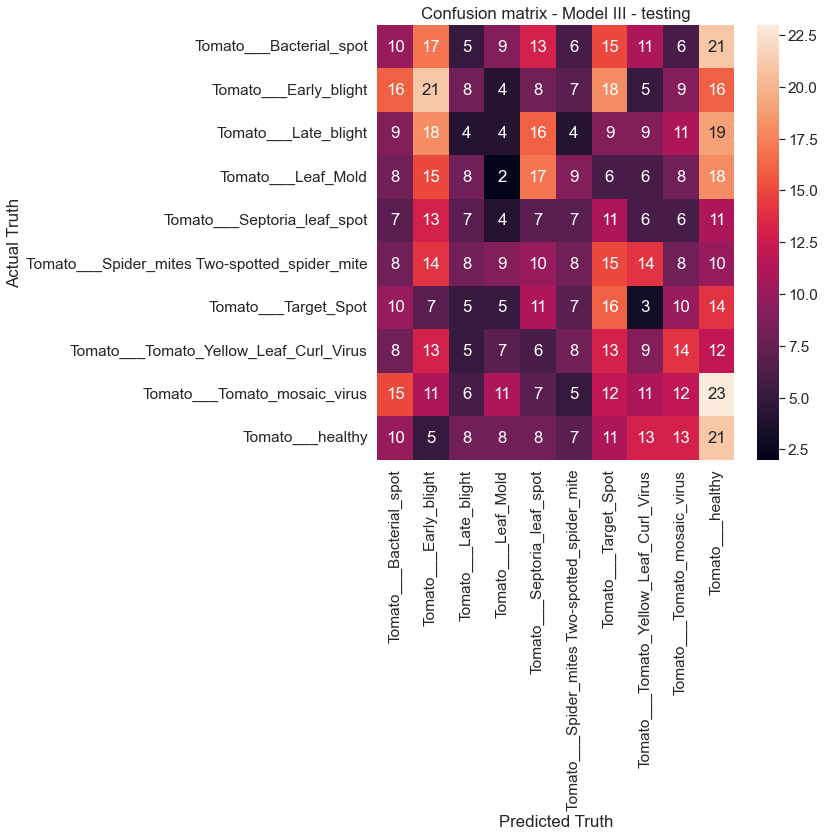

In [79]:
actual2, predicted2 = actual2_and_predicted2(test_d_set)
cmatrix2(actual2, predicted2, labels, 'test')

In [76]:
def metrics2(y_actual, y_pred, labels):
  
  cm = tf.math.confusion_matrix(y_actual, y_pred)
  tp = np.diag(cm) 
  precision2 = dict()
  recall2 = dict()
  for i in range(len(labels)):
    col = cm[:, i]
    fp = np.sum(col) - tp[i]

    row = cm[i, :]
    fn = np.sum(row) - tp[i] 

    precision2[labels[i]] = tp[i] / (tp[i] + fp) 

    recall2[labels[i]] = tp[i] / (tp[i] + fn) 

  return precision2, recall2

In [77]:
precision2, recall2 = metrics2(actual2, predicted2, labels)

In [78]:
precision2

{'Tomato___Bacterial_spot': 0.09917355371900827,
 'Tomato___Early_blight': 0.0821917808219178,
 'Tomato___Late_blight': 0.08108108108108109,
 'Tomato___Leaf_Mold': 0.06451612903225806,
 'Tomato___Septoria_leaf_spot': 0.07407407407407407,
 'Tomato___Spider_mites Two-spotted_spider_mite': 0.13,
 'Tomato___Target_Spot': 0.08108108108108109,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 0.11585365853658537,
 'Tomato___Tomato_mosaic_virus': 0.1092436974789916,
 'Tomato___healthy': 0.1}

In [79]:
recall2

{'Tomato___Bacterial_spot': 0.12903225806451613,
 'Tomato___Early_blight': 0.12631578947368421,
 'Tomato___Late_blight': 0.02586206896551724,
 'Tomato___Leaf_Mold': 0.038461538461538464,
 'Tomato___Septoria_leaf_spot': 0.10989010989010989,
 'Tomato___Spider_mites Two-spotted_spider_mite': 0.13978494623655913,
 'Tomato___Target_Spot': 0.057692307692307696,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 0.17757009345794392,
 'Tomato___Tomato_mosaic_virus': 0.11926605504587157,
 'Tomato___healthy': 0.052083333333333336}

In [82]:
import numpy as np
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predictions = model1.predict(img_array)
    predicted_class = cls_nms[np.argmax(predictions[0])]
    return predicted_class

1/1 [==============================] - 0s 47ms/step


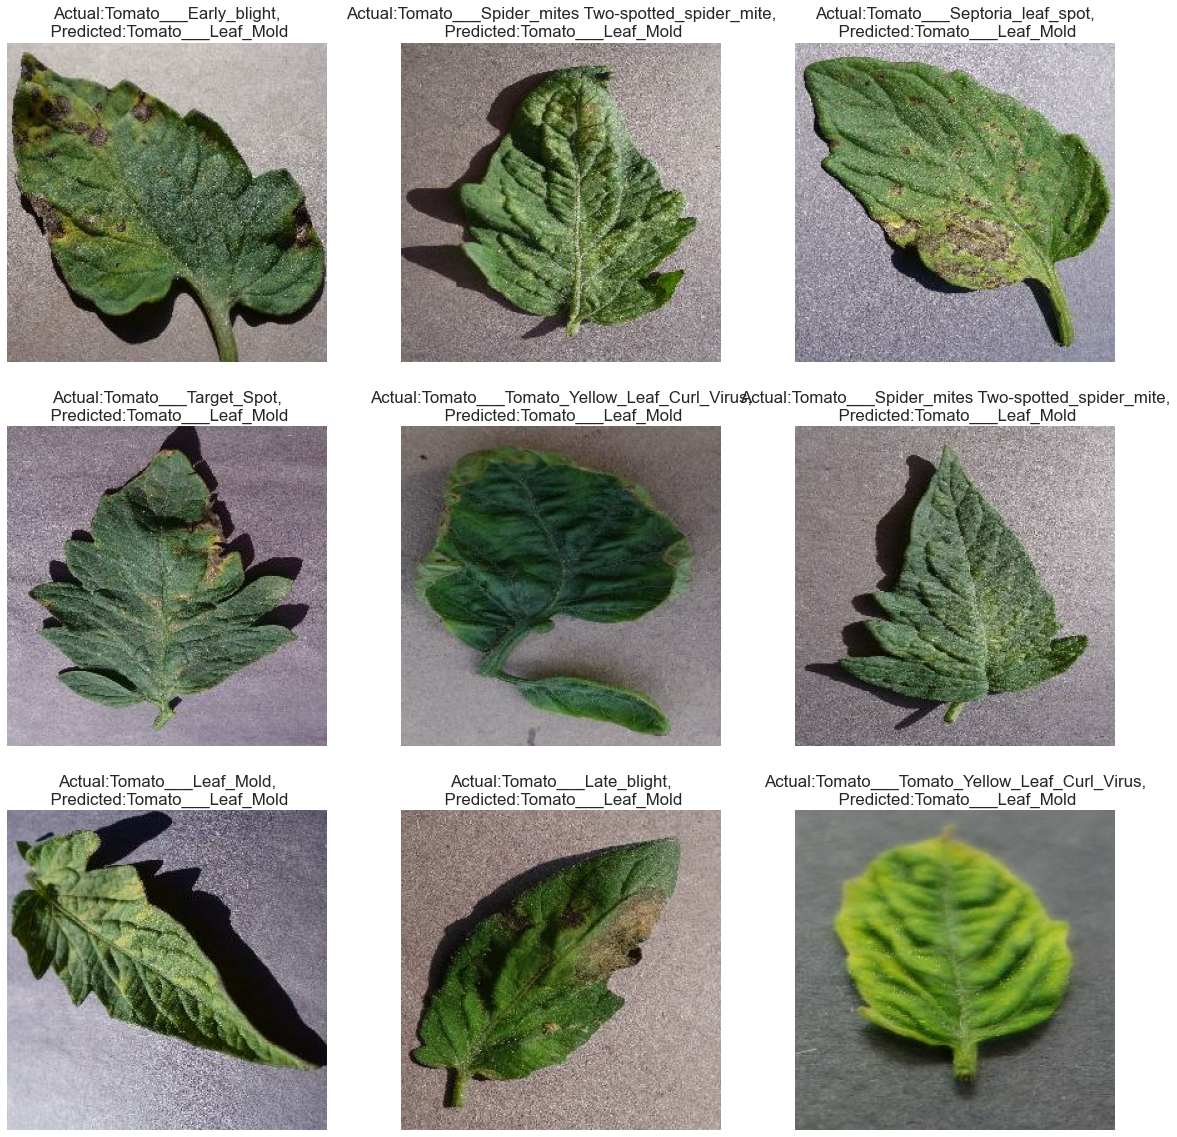

In [39]:
import numpy as np
plt.figure(figsize=(20,20))
for images, labels in test_d_set.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class = predict(model1, images[i].numpy())
        actual_class = cls_nms[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}")
        plt.axis("off")

In [41]:
import numpy as np
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predictions = model2.predict(img_array)
    predicted_class = cls_nms[np.argmax(predictions[0])]
    return predicted_class

1/1 [==============================] - 0s 53ms/step


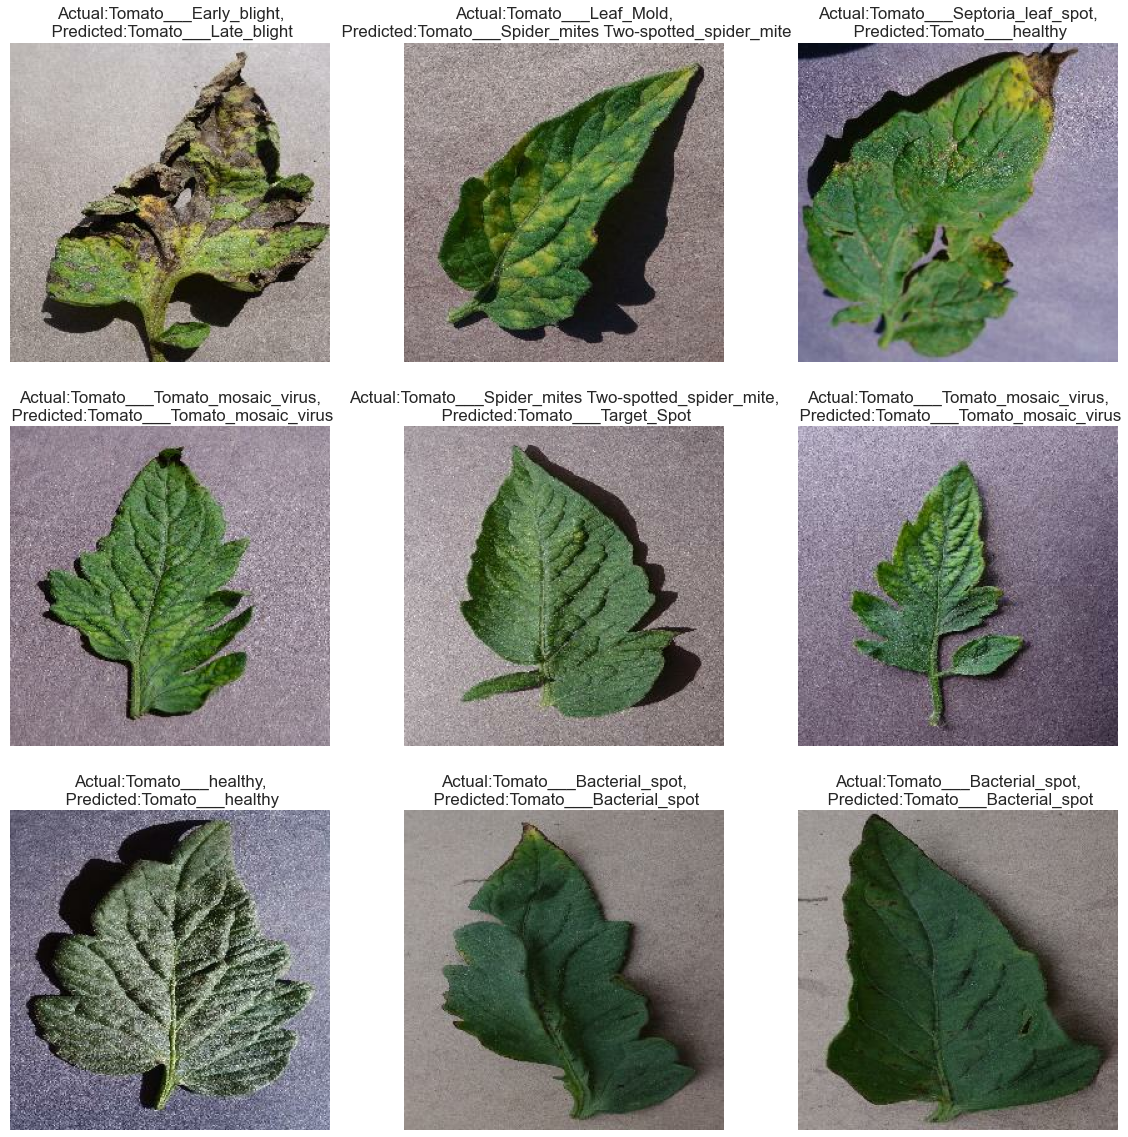

In [42]:
import numpy as np
plt.figure(figsize=(20,20))
for images, labels in test_d_set.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class = predict(model2, images[i].numpy())
        actual_class = cls_nms[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}")
        plt.axis("off")